### Ingrediants of deep learning explained with logistic regression

You will build a logistic regression classifier to recognize cats. Logistic regression can be considered as a very small neural network.

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 

**Loss or error function:** $ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$

If $ y =1: \mathcal{L}(\hat{y}, y) = -log(\hat{y})$ i.e. we want to make $\hat{y}$ large

If $ y =0: \mathcal{L}(\hat{y}, y) = -log(1-\hat{y})$ i.e. we want to make $\hat{y}$ as small as possible

**Cost function:**
The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

In [1]:
import numpy as np

In [2]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [3]:
print ("sigmoid(-0.1) = " + str(sigmoid(-0.1)))
print ("sigmoid(0.5) = " + str(sigmoid(0.5)))

sigmoid(-0.1) = 0.47502081252106
sigmoid(0.5) = 0.6224593312018546


In [4]:
def initialize_with_parameters_with_zeros(dim):
    """
    Initialize your weight matrix 'w' (vector in case of single neuron case) and bias 'b' which is a single scalar value
    in single neuron case other wise (no_of_neurons , 1)
    
    Hint => dimension of w (dim): should be equal to number of input variables
    
    This function should return w and b
    """
    w = np.zeros(shape=(dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [5]:
dim = 3
w, b = initialize_with_parameters_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0


**Forward and Backward propagation:**

- You get X (vectorize your data, in python data.flatten(),  $w\times h \times ch$)
- $z = w^{T} X + b$
- You compute $A = \sigma(z) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function (calculated over all input values) => $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

**Gradient descent:** 

We want to find w and b so that it minimize $J(w, b)$

Note in single neuron case with one layer only, your computed activation is the output so 'A' here is the activation output directly. However, remember that you can minimize cost only after computing loss for all the input variables.


- Find slopes:
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

- Update your parameters:

$$ w:= w - \alpha \frac{\partial J}{\partial w}$$
$$ b:= b - \alpha \frac{\partial J}{\partial b}$$

$\alpha$ here is the learning rate

In [6]:
def forward_backward_propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (e.g., containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost/J -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
#   # get the size of your input data
    m = X.shape[1]
    
    # Step 1: Forward propagation
    # compute activation
    A = sigmoid(np.dot(w.T, X) + b) 
    # remember: your activation is the output here but only if you have one neuron other wise it is activation at A^[L-1]    
    # compute cost J (we are not using mean square error as this is non-convex in binary classification,
    # so, we use logistic regression log likelihoods)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  
    
    # Step 2: Backward propagation (compute your derivatives of the computed cost see derivation above (slope))
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
#     return gradients and cost 
    
    return grads, cost

**Optimization** 

- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [7]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation 
        grads, cost = forward_backward_propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update your parameters (i.e. new set of w and b are found)
        w = w - learning_rate * dw  
        b = b - learning_rate * db
        
        # Record the costs every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

**Prediction**

We have implemented forward-, backward-propagations and updates. Now, we want to predict.

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 


In [8]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    #   Remember its always good idea to keep a sigmoid activation at output layer as now you will require to predict the labels
    A = sigmoid(np.dot(w.T, X) + b)
   
    #   For number of activations predict labels and save each prediction to be used later for computing training and validation accuracy 
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

**The model**

Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [9]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros (this is vector for single neuron but a matrix for multi-neuron network)
    w, b = initialize_with_parameters_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

**Prepare your data**

You will play with cat vs non-cat dataset provided to you. However, you have to first make sure that the data have correct dimensions. Normalize by dividing with 255 if you are using images (as for example this case). You will do the same in the remaining examples.

In [10]:
import numpy as np
import h5py

# training set
train_dataset = h5py.File('datasets/cat-non-cat/train_catvnoncat.h5', "r")
train_x = np.array (train_dataset["train_set_x"][:])
train_y = np.array( train_dataset["train_set_y"][:])

# testing set
test_dataset = h5py.File('datasets/cat-non-cat/test_catvnoncat.h5', "r")
test_x = np.array (test_dataset["test_set_x"][:])
test_y = np.array( test_dataset["test_set_y"][:])

# class list
classes = np.array(test_dataset["list_classes"][:])

# reshape labels
trainY = train_y.reshape(1, train_y.shape[0])
testY = test_y.reshape((1, test_y.shape[0]))

# warning: check dimensions and be sure of it!!!
print('classes are:', classes)
print('train_x:', train_x.shape)
print('train_y (training labels):', trainY.shape)
print('number of test labels:', testY.shape)

classes are: [b'non-cat' b'cat']
train_x: (209, 64, 64, 3)
train_y (training labels): (1, 209)
number of test labels: (1, 50)


In [11]:
train_x_flatten= train_x.reshape(train_x.shape[0], -1).T
test_x_flatten= test_x.reshape(test_x.shape[0], -1).T

print('flattened training data (train_x_flatten): ', train_x_flatten.shape)
print('flattened testing data (test_x_flatten): ', test_x_flatten.shape)

trainX = train_x_flatten/255.
testX = test_x_flatten/255.

flattened training data (train_x_flatten):  (12288, 209)
flattened testing data (test_x_flatten):  (12288, 50)


In [12]:
d = model(trainX, trainY, testX, testY, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 0, you predicted that it is a "cat" picture.


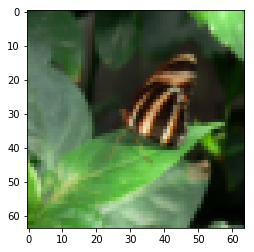

In [13]:
# Example of a picture that was wrongly classified.
import matplotlib.pyplot as plt
%matplotlib inline
index = 5 # try 45, 10, 20 or whatever you wish to (note: size of your test set is only 50)
plt.imshow(testX[:,index].reshape((64, 64, 3)))
prediction_label= int(d['Y_prediction_test'][0, index])
print ("y = " + str(testY[0, index]) + ", you predicted that it is a \"" + classes[prediction_label].decode("utf-8") +  "\" picture.")


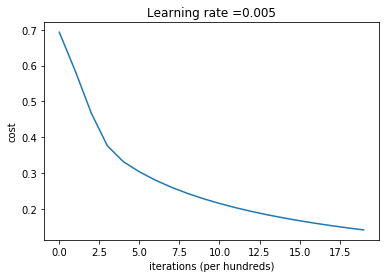

In [14]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Play with different learning rates and see how these effect your learning**

In order for Gradient Descent to work you must choose the learning rate wisely.

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



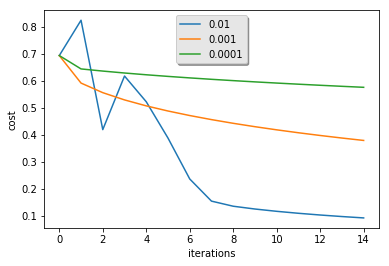

In [15]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(trainX, trainY, testX, testY, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()